In [94]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

In [95]:
X, y = make_classification(n_samples = 1000, weights = [0.98,0.02], n_features=5)

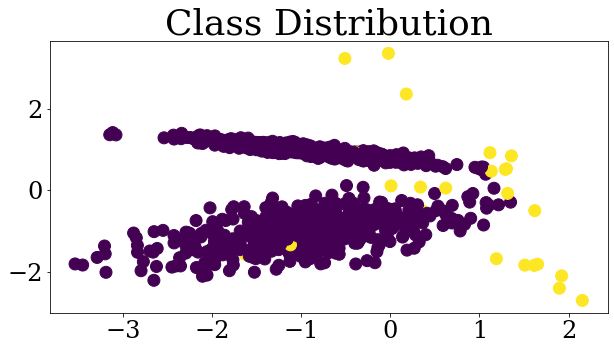

In [119]:
plt.figure(figsize = (10,5))
plt.scatter(X[:, 2], X[:,3], c=y)
plt.show()

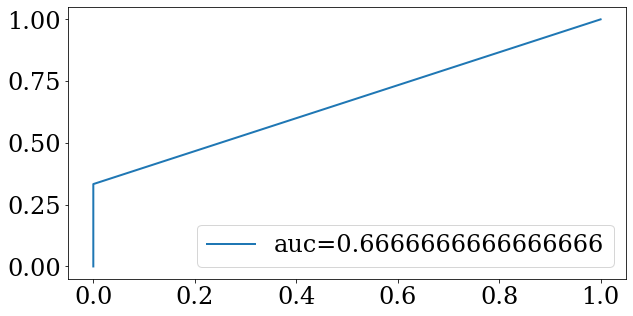

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       294
           1       1.00      0.33      0.50         6

    accuracy                           0.99       300
   macro avg       0.99      0.67      0.75       300
weighted avg       0.99      0.99      0.98       300



In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

lr = LogisticRegression()

lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
 
plt.figure(figsize = (10,5))
fpr, tpr, _ = roc_curve(y_test,  predictions)
auc = roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label = "auc=" + str(auc))
plt.legend(loc=4)
plt.show()
print(classification_report(y_test, predictions))


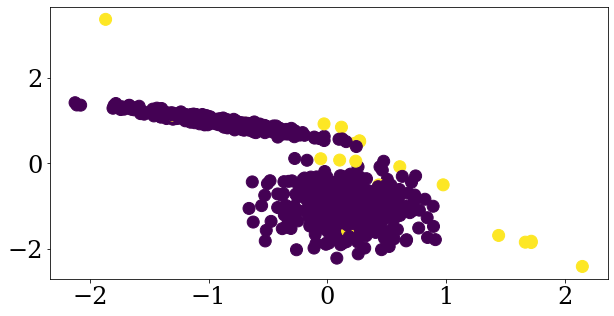

In [113]:
plt.figure(figsize = (10,5))
plt.scatter(X_train[:, 0], X_train[:,3], c=y_train)
plt.show()

In [99]:
#pip install imblearn 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

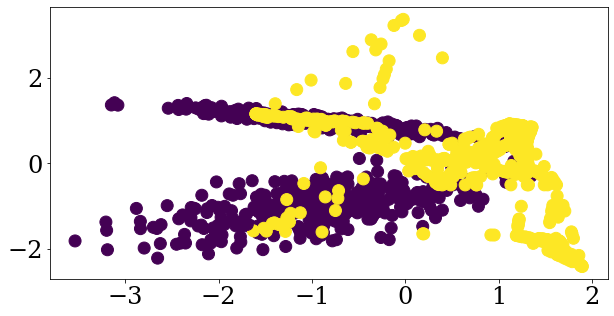

In [115]:
plt.figure(figsize = (10, 5))
plt.scatter(X_train_res[:, 2], X_train_res[:,3], c=y_train_res)
plt.show()

In [101]:
lr = LogisticRegression()

lr.fit(X_train_res, y_train_res.ravel())
  
predictions = lr.predict(X_test)
 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       294
           1       0.08      0.67      0.15         6

    accuracy                           0.85       300
   macro avg       0.54      0.76      0.53       300
weighted avg       0.97      0.85      0.90       300



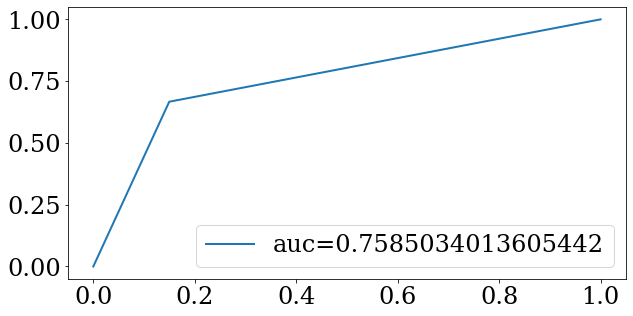

In [102]:
plt.figure(figsize = (10,5))
fpr, tpr, _ = roc_curve(y_test,  predictions)
auc = roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label = "auc=" + str(auc))
plt.legend(loc=4)
plt.show()